A/B Testing Case Study Using Python 

Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm 

Loading our CTR Data for A/B Test

In [5]:
df_ab_test = pd.read_csv('ab_test_click_data (1).csv')

# Display the first few rows of data:
print(df_ab_test.head())
print(df_ab_test.describe())
print(df_ab_test.shape)
print(df_ab_test.info())
print(df_ab_test.groupby("group").sum("click"))

   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00
            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000
(20000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    20000 non-null  int64 
 1   click      20000 non-null  int64 
 2   group      20000 non-null  object
 3   timestamp  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB
None
         user_

A simple bar chart showing the total clicks versus no-clicks in each group can provide a clear visual comparison of user engagement.

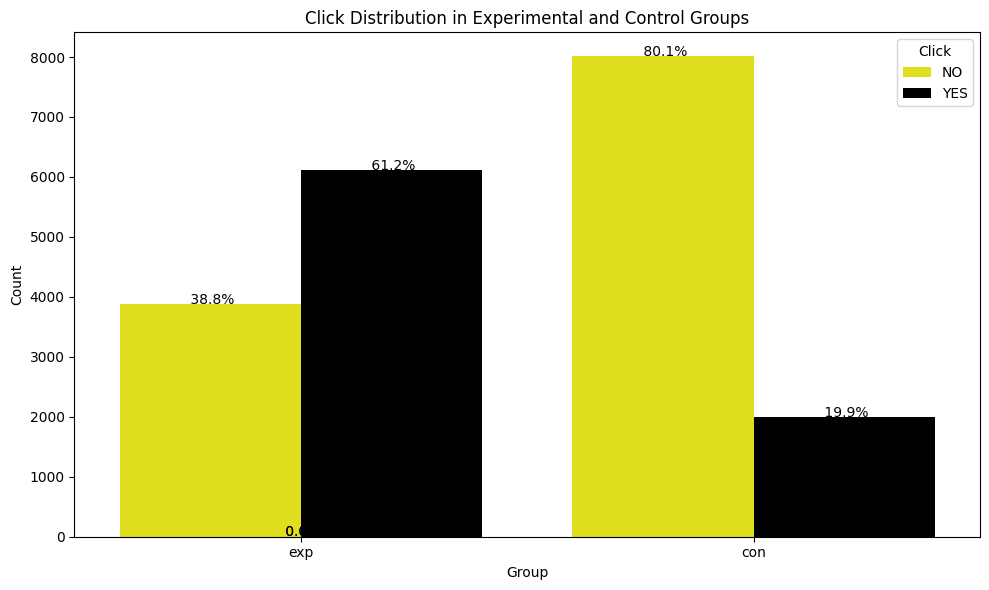

In [7]:
# Custom palette for yellow and black
palette = {0: 'yellow', 1: 'black'} #Assuming zero is for no-click and 1 is for click

# Plotting the click distribution for each group with the custom colors
plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'group', hue = 'click', data = df_ab_test, palette=palette)
plt.title('Click Distribution in Experimental and Control Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title = 'Click', labels= ['NO','YES'])

# Calculate the percentages and annotate the bars 
group_counts = df_ab_test.groupby(['group']).size()
group_click_counts = df_ab_test.groupby(['group','click']).size().reset_index(name='count')

for p in ax.patches:
    height = p.get_height()
    # Find the group and click type for the current bar
    group = 'exp' if p.get_x()<0.5 else 'con' 
    click = 1 if p.get_x() % 1 > 0.5 else 0 
    total = group_counts.loc[group]
    percentage = 100 * height/total 
    ax.text(p.get_x() + p.get_width()/ 2., height +5, f'{percentage: .1f}%', ha = "center", color = 'black', fontsize = 10)

plt.tight_layout()
plt.show()



Parameters of the Model from Power Analysis 


Beta: Probability of Type II Error 
(1-Beta): Power of the Test 
Alpha = Probablityof Type I Error, Significance Level 
Delta = Minimum Detectable Effect

In [8]:
alpha = 0.05 
print("Alpha: significance level is:", alpha)

delta = 0.1 
print("Delta: minimum detectable effect is:", delta)

Alpha: significance level is: 0.05
Delta: minimum detectable effect is: 0.1


Calculating total number of clicks per group by summing clicks 

In [10]:
N_con = df_ab_test[df_ab_test["group"] == "con"].count()
N_exp = df_ab_test[df_ab_test["group"]== "exp"].count()

# Calculating the total number of clicks per group by summing 1's 
X_con = df_ab_test.groupby("group")["click"].sum().loc["con"]
X_exp = df_ab_test.groupby("group")["click"].sum().loc["exp"]

# printing this visibility 
print(df_ab_test.groupby("group")["click"].sum())
print("Number of User in Control: ", N_con)
print("Number of User in Experimental:", N_exp)
print("Number of clicks in Control: ", X_con)
print("Number of clicks in Experimental:", X_exp)

group
con    1989
exp    6116
Name: click, dtype: int64
Number of User in Control:  user_id      10000
click        10000
group        10000
timestamp        0
dtype: int64
Number of User in Experimental: user_id      10000
click        10000
group        10000
timestamp    10000
dtype: int64
Number of clicks in Control:  1989
Number of clicks in Experimental: 6116


Calculating Pooled Estimates for Clicks per Group

In [11]:
# computing the estimate of click probability per group 
p_con_hat = X_con/N_con 
p_exp_hat = X_exp/N_exp 

print("Click Probability in Control Group:", p_con_hat)
print("Click Probability in Experimental Group:", p_exp_hat)

# computing the estimate of pooled clicked Probability
p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)

Click Probability in Control Group: user_id      0.1989
click        0.1989
group        0.1989
timestamp       inf
dtype: float64
Click Probability in Experimental Group: user_id      0.6116
click        0.6116
group        0.6116
timestamp    0.6116
dtype: float64
